<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/QuantumGates_SWAPGate_QiskitAerSimulator_mkbahk_20250123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]=='1.2.4'
#%pip install qiskit_ibm_runtime=='0.30.0'
%pip install qiskit_aer=='0.15.1'
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.3 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=517116853207b7a27f109b39eb9e1323aef1ef4e66bfa89931bf87154d35842e
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 83.7 MB/s eta 0:00:00
  Cloning https://github.com/qisk

In [2]:
%pip show qiskit qiskit_aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-textbook
---
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [3]:
from qiskit_aer import AerSimulator
backend = AerSimulator(method="statevector") # 'automatic', 'statevector', 'density_matrix', 'stabilizer', 'matrix_product_state', 'extended_stabilizer', 'unitary', 'superop'
print(backend)

AerSimulator('aer_simulator_statevector')


In [4]:
print(backend.configuration().basis_gates)

['ccx', 'ccz', 'cp', 'crx', 'cry', 'crz', 'cswap', 'csx', 'cu', 'cu1', 'cu2', 'cu3', 'cx', 'cy', 'cz', 'diagonal', 'ecr', 'h', 'id', 'mcp', 'mcphase', 'mcr', 'mcrx', 'mcry', 'mcrz', 'mcswap', 'mcsx', 'mcu', 'mcu1', 'mcu2', 'mcu3', 'mcx', 'mcx_gray', 'mcy', 'mcz', 'multiplexer', 'p', 'pauli', 'r', 'rx', 'rxx', 'ry', 'ryy', 'rz', 'rzx', 'rzz', 's', 'sdg', 'store', 'swap', 'sx', 'sxdg', 't', 'tdg', 'u', 'u1', 'u2', 'u3', 'unitary', 'x', 'y', 'z', 'break_loop', 'continue_loop', 'delay', 'for_loop', 'if_else', 'initialize', 'kraus', 'qerror_loc', 'quantum_channel', 'reset', 'roerror', 'save_amplitudes', 'save_amplitudes_sq', 'save_density_matrix', 'save_expval', 'save_expval_var', 'save_probabilities', 'save_probabilities_dict', 'save_state', 'save_statevector', 'save_statevector_dict', 'set_statevector', 'switch_case', 'while_loop']



# SWAP-Gate
* 두 큐비트의 상태를 서로 바꾸는 양자 게이트.
* 물리적으로 큐비트를 교환하는 연산을 수행하며, 회로 최적화나 특정 물리적 레이아웃에서 매우 중요

In [6]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import math
GateCircuit = QuantumCircuit(2, 2)
GateCircuit.swap(0, 1)

In [7]:
from qiskit.quantum_info import Operator
unitary = Operator(GateCircuit)
print(unitary)

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [8]:
from qiskit.visualization import array_to_latex

#Alternative way of representing in latex
array_to_latex(unitary)

<IPython.core.display.Latex object>

In [9]:
qc = QuantumCircuit(2, 2)
qc.reset(0)
qc.x(0)
qc.reset(1)
qc.swap(0, 1)
qc.measure(0, 0)
qc.measure(1, 1)

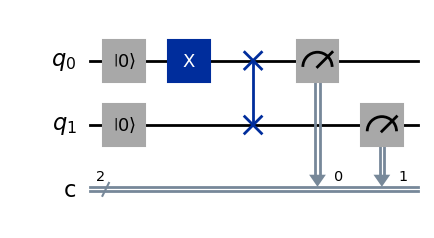

In [10]:
qc.draw(output='mpl')

In [11]:
job = backend.run(qc, shots=1024)
result = job.result()

In [12]:
result

Result(backend_name='aer_simulator_statevector', backend_version='0.15.1', qobj_id='', job_id='47d9b311-b75b-423e-a91e-974ca8f437ae', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x2': 1024}), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit-170', qreg_sizes=[['q', 2]], metadata={}), status=DONE, seed_simulator=2440378871, metadata={'time_taken': 0.015224079, 'num_bind_params': 1, 'parallel_state_update': 1, 'required_memory_mb': 1, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 2, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'parallel_shots': 2, 'runtime_parameter_bind': False, 'max_memory_mb': 12978, 'noise': 'ideal', 'measure_sampling': False, 'batched_shots_optimization': False, 'fusion': {'applied': False, 'max_fused_qubits': 5, 'threshold': 14, 'enabled': True}}, time_taken=0.

In [13]:
result.results

[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x2': 1024}), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit-170', qreg_sizes=[['q', 2]], metadata={}), status=DONE, seed_simulator=2440378871, metadata={'time_taken': 0.015224079, 'num_bind_params': 1, 'parallel_state_update': 1, 'required_memory_mb': 1, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 2, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'parallel_shots': 2, 'runtime_parameter_bind': False, 'max_memory_mb': 12978, 'noise': 'ideal', 'measure_sampling': False, 'batched_shots_optimization': False, 'fusion': {'applied': False, 'max_fused_qubits': 5, 'threshold': 14, 'enabled': True}}, time_taken=0.015224079)]

In [14]:
result.results[0].data.counts

{'0x2': 1024}

In [15]:
result.get_counts()

{'10': 1024}

In [16]:
counts = result.get_counts()
print(counts)

{'10': 1024}


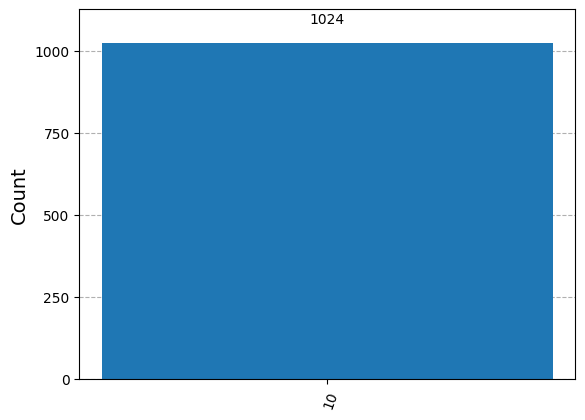

In [17]:
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector,plot_state_paulivec, plot_state_hinton, plot_state_qsphere
plot_histogram(counts)

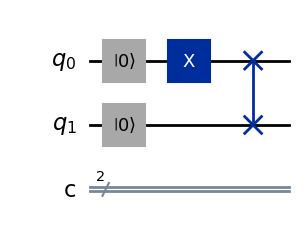

In [21]:
qc2 = QuantumCircuit(2, 2)
qc2.reset(0)
qc2.x(0)
qc2.reset(1)
qc2.swap(0, 1)
qc2.draw(output='mpl')

In [22]:
from qiskit.quantum_info import Statevector
psi = Statevector(qc2)
print(psi)

Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))


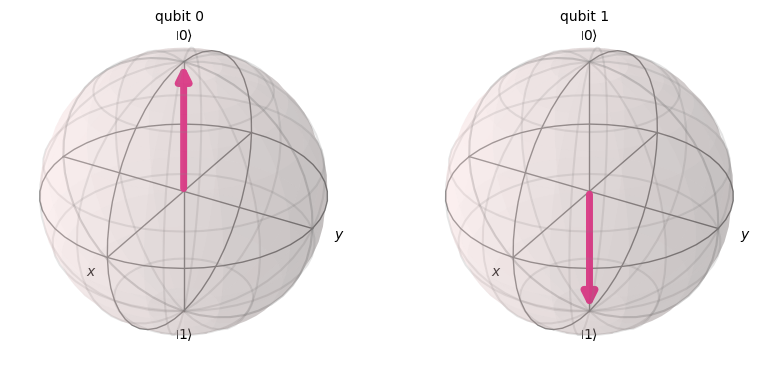

In [23]:
plot_bloch_multivector(state=psi)

In [24]:
from qiskit_aer import Aer

# Aer 시뮬레이터 백엔드 목록 가져오기
backends = Aer.backends()

# 각 백엔드의 지원 basis gate 출력
print("Aer Simulators and Supported Basis Gates:\n")
for backend in backends:
    print(f"Backend: {backend.name}")
    print(f"Basis Gates: {backend.configuration().basis_gates}")
    print("-" * 50)
###for

Aer Simulators and Supported Basis Gates:

Backend: aer_simulator
Basis Gates: ['ccx', 'ccz', 'cp', 'crx', 'cry', 'crz', 'cswap', 'csx', 'cu', 'cu1', 'cu2', 'cu3', 'cx', 'cy', 'cz', 'diagonal', 'ecr', 'h', 'id', 'mcp', 'mcphase', 'mcr', 'mcrx', 'mcry', 'mcrz', 'mcswap', 'mcsx', 'mcu', 'mcu1', 'mcu2', 'mcu3', 'mcx', 'mcx_gray', 'mcy', 'mcz', 'multiplexer', 'p', 'pauli', 'r', 'roerror', 'rx', 'rxx', 'ry', 'ryy', 'rz', 'rzx', 'rzz', 's', 'sdg', 'store', 'swap', 'sx', 'sxdg', 't', 'tdg', 'u', 'u1', 'u2', 'u3', 'unitary', 'x', 'y', 'z', 'break_loop', 'continue_loop', 'delay', 'for_loop', 'if_else', 'initialize', 'kraus', 'qerror_loc', 'quantum_channel', 'reset', 'roerror', 'save_amplitudes', 'save_amplitudes_sq', 'save_clifford', 'save_density_matrix', 'save_expval', 'save_expval_var', 'save_matrix_product_state', 'save_probabilities', 'save_probabilities_dict', 'save_stabilizer', 'save_state', 'save_statevector', 'save_statevector_dict', 'save_superop', 'save_unitary', 'set_density_matrix'